# Cadre

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.__version__

'1.23.2'

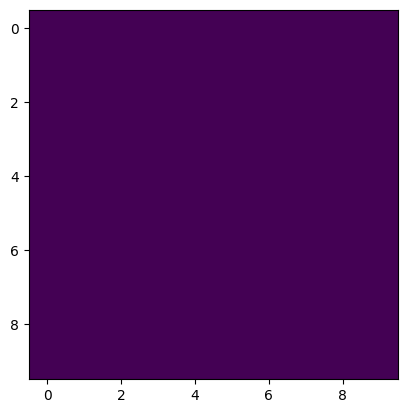

In [2]:
square = np.ones((10, 10))
plt.imshow(square);

In [3]:
def cadre(tab, inplace=True): 
    n, p = np.shape(tab)
    if inplace:
        tab2 = tab
    else:
        tab2 = tab.copy()
    tab2[:, 1] = 0
    tab2[1, :] = 0
    tab2[:, p-2] = 0
    tab2[n-2, :] = 0
    return tab2

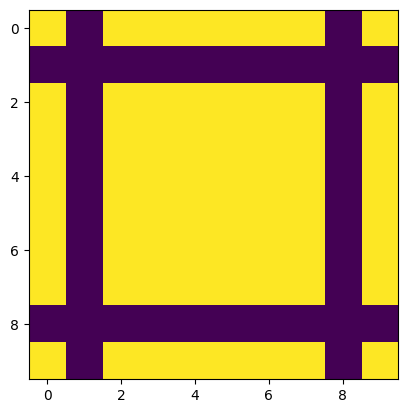

In [4]:
plt.imshow(cadre(square, inplace=False));

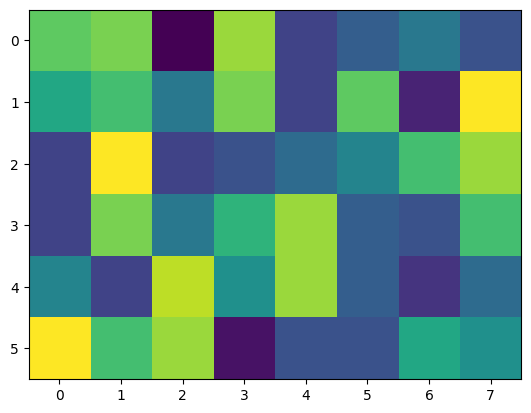

In [5]:
tabl = np.random.randint(0, 21, (6, 8), dtype='uint8')
plt.imshow(tabl);

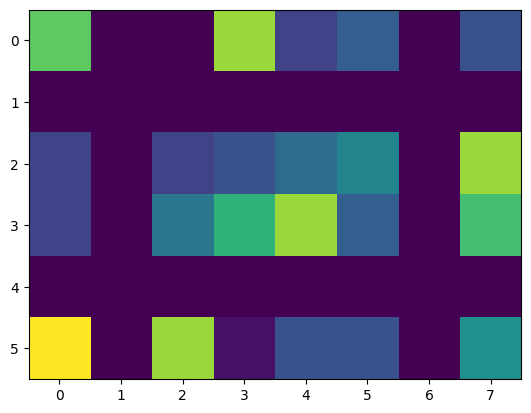

In [6]:
plt.imshow(cadre(tabl, inplace=False));

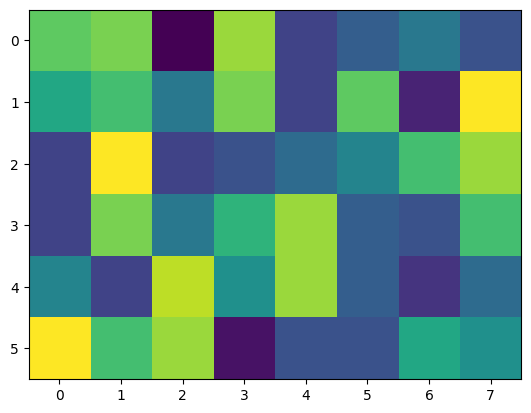

In [7]:
plt.imshow(tabl);

On voit que **cadre** marche bien, même si le tableau n'est pas un carré. En mettant l'argument **inplace=False**, le tableau d'origine n'est pas modifié. 

# Cadre 2

Cette fois, on en peut plus faire les modifications en place, car on modifie les dimensions du tableau. 

In [6]:
import numpy as np
from matplotlib import pyplot as plt


def cadre2(tab):
    n, p = tab.shape
    tab2 = np.zeros((n+2, p+2)) # on rajoute deux lignes et deux colonnes. 
    tab2[1:n+1, 1:p+1] = tab
    return tab2

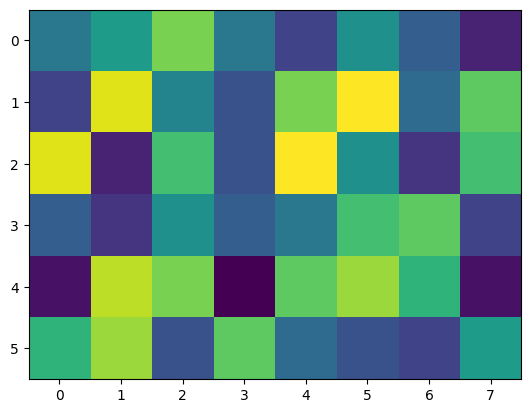

In [7]:
tabl = np.random.randint(0, 21, (6, 8), dtype='uint8')
plt.imshow(tabl);

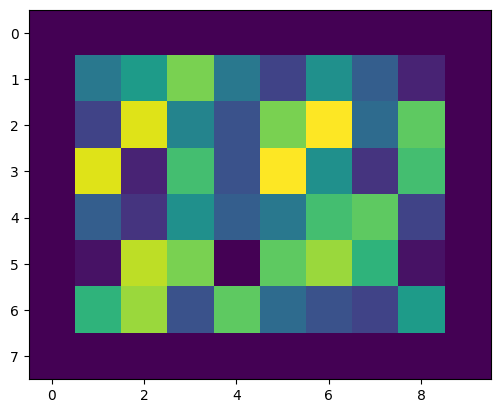

In [8]:
plt.imshow(cadre2(tabl));

La fonction marche bien sur cet exemple.